In [181]:
from matplotlib import pyplot, patches
from matplotlib.path import Path
from numpy import matrix, pi, cos, sin, array, mean, less
from numpy.linalg import svd
from numpy.random import random, normal
from itertools import product

In [182]:
%matplotlib inline

In [183]:
target = random((5, 2))
target = array(target)

In [184]:
theta = random() * 2 * pi
b = random((2, 1)) * 2 - 1

In [185]:
R = array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

In [186]:
source = R.dot(target.T).T + b.T + normal(0, .05, target.shape)

In [187]:
codes = [Path.MOVETO] + [Path.LINETO] * (len(source) - 1) + [Path.CLOSEPOLY]

def visualize(target, source):

    path_target = Path(target.tolist() + [target[0]], codes)
    path_source = Path(source.tolist() + [source[0]], codes)

    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    patch_target = patches.PathPatch(path_target, facecolor='yellow', alpha=0.5)
    patch_source = patches.PathPatch(path_source, facecolor='blue', alpha=0.5)
    ax.add_patch(patch_target)
    ax.add_patch(patch_source)
    pyplot.grid(True)
    pyplot.axis('equal')
    pyplot.autoscale(True)
    pyplot.show()

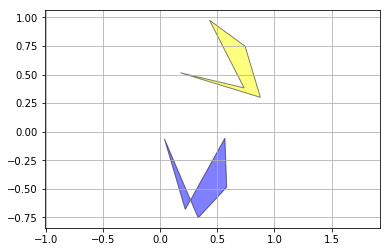

In [188]:
visualize(target, source)

In [189]:
def find_transformation(labeling, source):
    centroid_target = mean(labeling, axis=0)
    centroid_source = mean(source, axis=0)
    H = ((labeling - centroid_target).T).dot(source - centroid_source)
    U, S, V = svd(H)
    R = (U.T).dot(V.T)
    t = centroid_target - R.dot(centroid_source.T).T
    return array(R.dot(source.T).T + t)

In [190]:
def brute_force_fitting(target, source):
    best_result = float('inf')
    best_labeling = None
    i = 0
    for labeling in product(target, repeat=len(source)):
        i += 1
        result = find_transformation(labeling, source)
        if ((result - target) ** 2).sum() < best_result:
            best_result = ((result - target) ** 2).sum()
            best_labeling = labeling
    print 'Number of iterations:', i
    return find_transformation(best_labeling, source)

Number of iterations: 3125


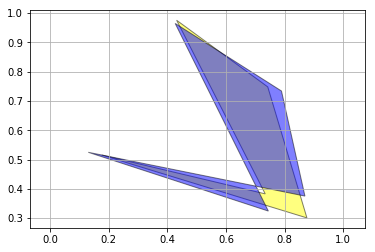

CPU times: user 664 ms, sys: 0 ns, total: 664 ms
Wall time: 661 ms


In [191]:
%%time
visualize(target, brute_force_fitting(target, source))

In [192]:
print 'R\n{}\nb\n{}\ntarget\n{}\nsource\n{}'.format(R, b, target, source)

R
[[ 0.58543846  0.81071685]
 [-0.81071685  0.58543846]]
b
[[-0.4996642 ]
 [-0.30347446]]
target
[[ 0.7428507   0.74813461]
 [ 0.87655168  0.30074962]
 [ 0.17576478  0.51562948]
 [ 0.73408914  0.38292509]
 [ 0.4316154   0.97569631]]
source
[[ 0.58207645 -0.48614013]
 [ 0.33194645 -0.75553954]
 [ 0.03568099 -0.06134348]
 [ 0.21895684 -0.68169984]
 [ 0.56633887 -0.05634442]]
